In [105]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import zipfile

In [106]:
with zipfile.ZipFile("playername_startdate_win.csv.zip","r") as zip_ref:
    zip_ref.extractall("playername_startdate_win.csv")

In [107]:
print("Loading Data")
df = pd.read_csv('playername_startdate_win.csv/playername_startdate_win.csv')
df = df.sort_values(by=['pname','tstart'], ascending=True)
print("Data Loaded")

Loading Data
Data Loaded


In [108]:
def map_reduce(x,y):
    if y: #if win = True, reset counter by adding 1 to end of list
        x.append(1)
    else: #if win = False, increment last number in list by 1
        x[len(x)-1]+=1
    return x # pass the list up sequentially 

def accum_condition(x):
    return reduce(map_reduce, x,[0])

print("Grouping and Aggregating Data")
dataset = df.groupby(['pname'])['win'].aggregate(accum_condition)
print("Done Grouping and Aggregating")


print("Processing Data")
avgmap = {} #list_of_games_between_nth_and_n_minus_1th_win_for_each_player
for key in dataset.keys():
    dataset[key].pop() #remove the last count (since a player may have not won the absolute last game played)
    for i in range(0,len(dataset[key])):
        if i not in avgmap.keys():
            avgmap[i] = []
        avgmap[i].append(dataset[key][i])

plot_data = [] # This is what we are plotting
plot_data2 = [] # This is what we are plotting
for i in range(0,len(avgmap.keys())):
    plot_data.append(sum(avgmap[i]) / len(avgmap[i]))
    avgmap[i].sort()
    plot_data2.append(avgmap[i][len(avgmap[i])/2])
print ("Done Processing")

Grouping and Aggregating Data
Done Grouping and Aggregating
Processing Data
Done Processing


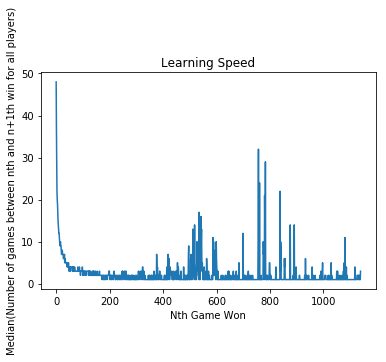

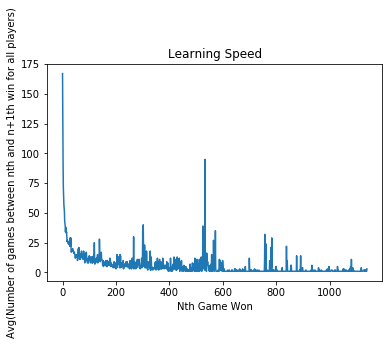

In [109]:
plt.plot(list(range(0, len(plot_data2))),plot_data2,label="median")
plt.xlabel('Nth Game Won')
plt.ylabel('Median(Number of games between nth and n+1th win for all players)')
plt.title("Learning Speed")
plt.show()

plt.plot(list(range(0, len(plot_data))),plot_data,label="avg")
plt.xlabel('Nth Game Won')
plt.ylabel('Avg(Number of games between nth and n+1th win for all players)')
plt.title("Learning Speed")
plt.show()

Grouping and Aggregating Data
Done Grouping and Aggregating


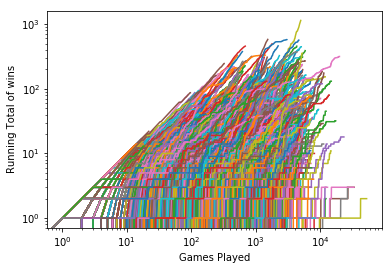

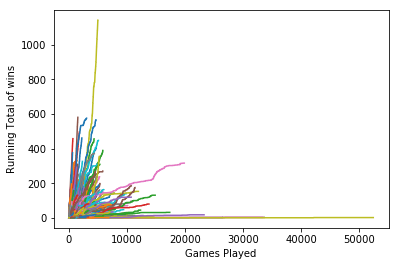

In [110]:

def map_reduce2(x,y):
    current_total = x[len(x)-1]
    if y: #if win = True, increment running total by 1
        x.append(current_total+1)
    else: #if win = False, just add current running toal
        x.append(current_total)
    return x # pass the list up sequentially 

def accum_condition2(x):
    return reduce(map_reduce2, x,[0])

print("Grouping and Aggregating Data")
dataset = df.groupby(['pname'])['win'].aggregate(accum_condition2)
print("Done Grouping and Aggregating")

for key in dataset.keys():
    if dataset[key][len(dataset[key])-1] > 0:
        plt.plot(list(range(0, len(dataset[key]))),dataset[key],label=key)
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Games Played')
plt.ylabel('Running Total of wins')
plt.title("")
plt.show()

for key in dataset.keys():
    if dataset[key][len(dataset[key])-1] > 0:
        plt.plot(list(range(0, len(dataset[key]))),dataset[key],label=key)
plt.xlabel('Games Played')
plt.ylabel('Running Total of wins')
plt.title("")
plt.show()

In [111]:
for key in dataset.keys():
    if dataset[key][len(dataset[key])-1] > 500:
        print("over 500 wins: " + str(key) + " " + str(dataset[key][len(dataset[key])-1]) + " / " + str(len(dataset[key])))
    if len(dataset[key]) > 15000:
        print("over 15000 games: " + str(key) + " " + str(dataset[key][len(dataset[key])-1]) + " / " + str(len(dataset[key])))

over 15000 games: Gargoyl 3 / 33642
over 15000 games: Meow 3 / 26495
over 15000 games: Sbamiri 0 / 35526
over 15000 games: Sebi 0 / 106264
over 500 wins: Yermak 1140 / 4989
over 500 wins: bmfx 580 / 1538
over 15000 games: dscm 0 / 21733
over 15000 games: ew 0 / 40587
over 15000 games: knot 3 / 33323
over 500 wins: kuniqs 575 / 3043
over 15000 games: p0werm0de 316 / 19878
over 15000 games: pigah 2 / 52440
over 500 wins: shummie 566 / 4647
over 15000 games: slep 0 / 36437
over 15000 games: syban 18 / 23284
over 15000 games: tlatlagkaus 32 / 17375
